## Machine Learning for Neuroscience, <br>Department of Brain Sciences, Faculty of Medicine, <br> Imperial College London
### Contributors: Francesca Palermo, Nan Fletcher-Lloyd, Alex Capstick, Yu Chen
**Winter 2022**


# Machine Learning for Beginners

This assessment will test your knowledge of key machine learning concepts.

## Instructions for Assessment

Please open a new notebook and complete all tasks/questions as given in the instructions below. At the end of this lab, you will submit your notebook for review. You will receive feedback on each lab, as well as a mark if the lab is summative.

Your work will be evaluated based on the following criteria:

- code

- understanding of methodology

- visual presentation of results

- accuracy of results

Total marks available will be given as a guidance in closed brackets after each question/task.

### Let's get started!

*N.B. Remember to import all your dependencies.*

<span style="color: red;"><b>Assessment Part 1)</b> </span>

1. [2 Marks] Explain why it is important to scale feature data. 

2. [4 Marks] Give an example of two different types of models for which the data would not need to undergo scaling. Explain why. 

2. [4 Marks] What is the difference between normalization and standardization? Name a sci-kit learn scaler you would use for each. 

1. Machine learning algorithms that calculate distance or assume normality are sensitive to relative scales of features, meaning that if the data is not scaled, features with a higher value range start dominating the model's decision-making process. Feature scaling is therefore needed to bring features with different ranges into comparable ranges. Feature scaling also allows for much faster model convergence.

2. Algorithms that rely on rules and are therefore not affected any monotonic transformations of the variables such as Random Forests. Algorithms that are by design equipped to handle this and give weights to features accordingly such as Naive Bayes.

3. Standardization transforms the data to have a mean of zero and a standard deviation of one (StandardScaler), whereas normalization scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one (MinMaxScaler).

<span style="color: red;"><b>Assessment Part 2)</b> </span>

1. [1 Mark] What is the difference between supervised and unsupervised learning? 

2. [1 Mark] What is the difference between classification and regression? 

3. [2 Marks] Explain why you shouldn't test the parameters of a prediction function on the same data it was trained on. 

4. [3 Marks] Using k-fold classification as an example, explain the basic concept behind cross-validation and when it is particularly useful. 

5. [2 Marks] Explain why accuracy is not always the most suitable measure by which to evaluate the performance of a classification model. 

6. [1 Mark] Explain the difference between MAE and MSE (feel free to use equations). 

1. Supervised learning uses labelled datasets to train algorithms to identify the category to which an obejct belongs or predict outcomes, whereas unsupervised learning uses machine learning algorithms to analzye and cluster unlabelled datasets.

2. Classification involves identifying a category to which an object belongs, whereas regression involves predicting a continuous-valued attribute associated with an object.

3. Learning the parameters of the prediction function and testing it on the same data would mean a model would just be repeating the labels of the samples it has just seen, deriving a perfect score, but failing to predict anything useful on as-of-yet unseen data. This situation is known as overfitting, and to avoid it the most common practice is to hold out part of the available data as a test set.

4. In the basic approach, otherwise known as k-fold cross-validation, the data is split into k folds. The model is trained using k - 1 of the folds as training data and validation on the remaining part of the data. This is repeated for each fold. The performance measures reported by k-fold cross-validation is then the average of the values computed in the loop. It is particularly useful when handling small datasets or those with class imbalances.

5. Accuracy is the ratio of correctly classified instances to the total instances. If there is a class imbalance biased against the class of interest, accuracy will not be representative of the power of the model to predict that class.

6. The MAE computes a risk metric corresponding to the expected value of the absolute error loss, whereas the MSE computes a risk metric corresponding to the expected value of the squared error or loss. 

<span style="color: red;"><b>Assessment Part 3)</b> </span>

Given that future labs will focus more on classification and regression, the last 10 points of this assessment will focus on clustering.

For this part of the assessment, you will be using the wine dataset.

[1 Mark] Visualise the relationship between each variable and every other variable within the dataset.

[5 Marks] Find the optimum number of clusters, showing your process. 

[2 Marks] Implement your clustering and visualise your clusters. 

[2 Mark] Visualise and describe the characteristics of each cluster. 

#### Load dependencies

In [1]:
!pip install --user plotly -U
import plotly as plotly
import plotly.express as px
import sklearn as sk
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load data

In [2]:
data = datasets.load_wine(as_frame=True)
features = data.data # this derives features as a dataframe (13 features by 178 instances)
labels = data.target # this derives labels as a dataframe (178 instances)

In [3]:
features

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
labels.unique()

array([0, 1, 2])

#### Process data

In [5]:
scaler = StandardScaler()
standardized_data = pd.DataFrame(scaler.fit_transform(features),
                   columns=['Alcohol','Malic Acid','Ash','Alcalinity of Ash','Magnesium','Total Phenols','Flavanoids', 'Nonflavanoid Phenols','Proanthocyanins','Color Intensity','Hue','OD280/OD315 of Diluted Wines','Proline'])
standardized_data

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [6]:
wine = pd.concat([standardized_data, labels], axis=1)
wine.rename(columns = {'target':'Class'}, inplace=True)
wine

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline,Class
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,2
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,2
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,2
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,2


#### Visualise data

/Users/nanfletcher-lloyd/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

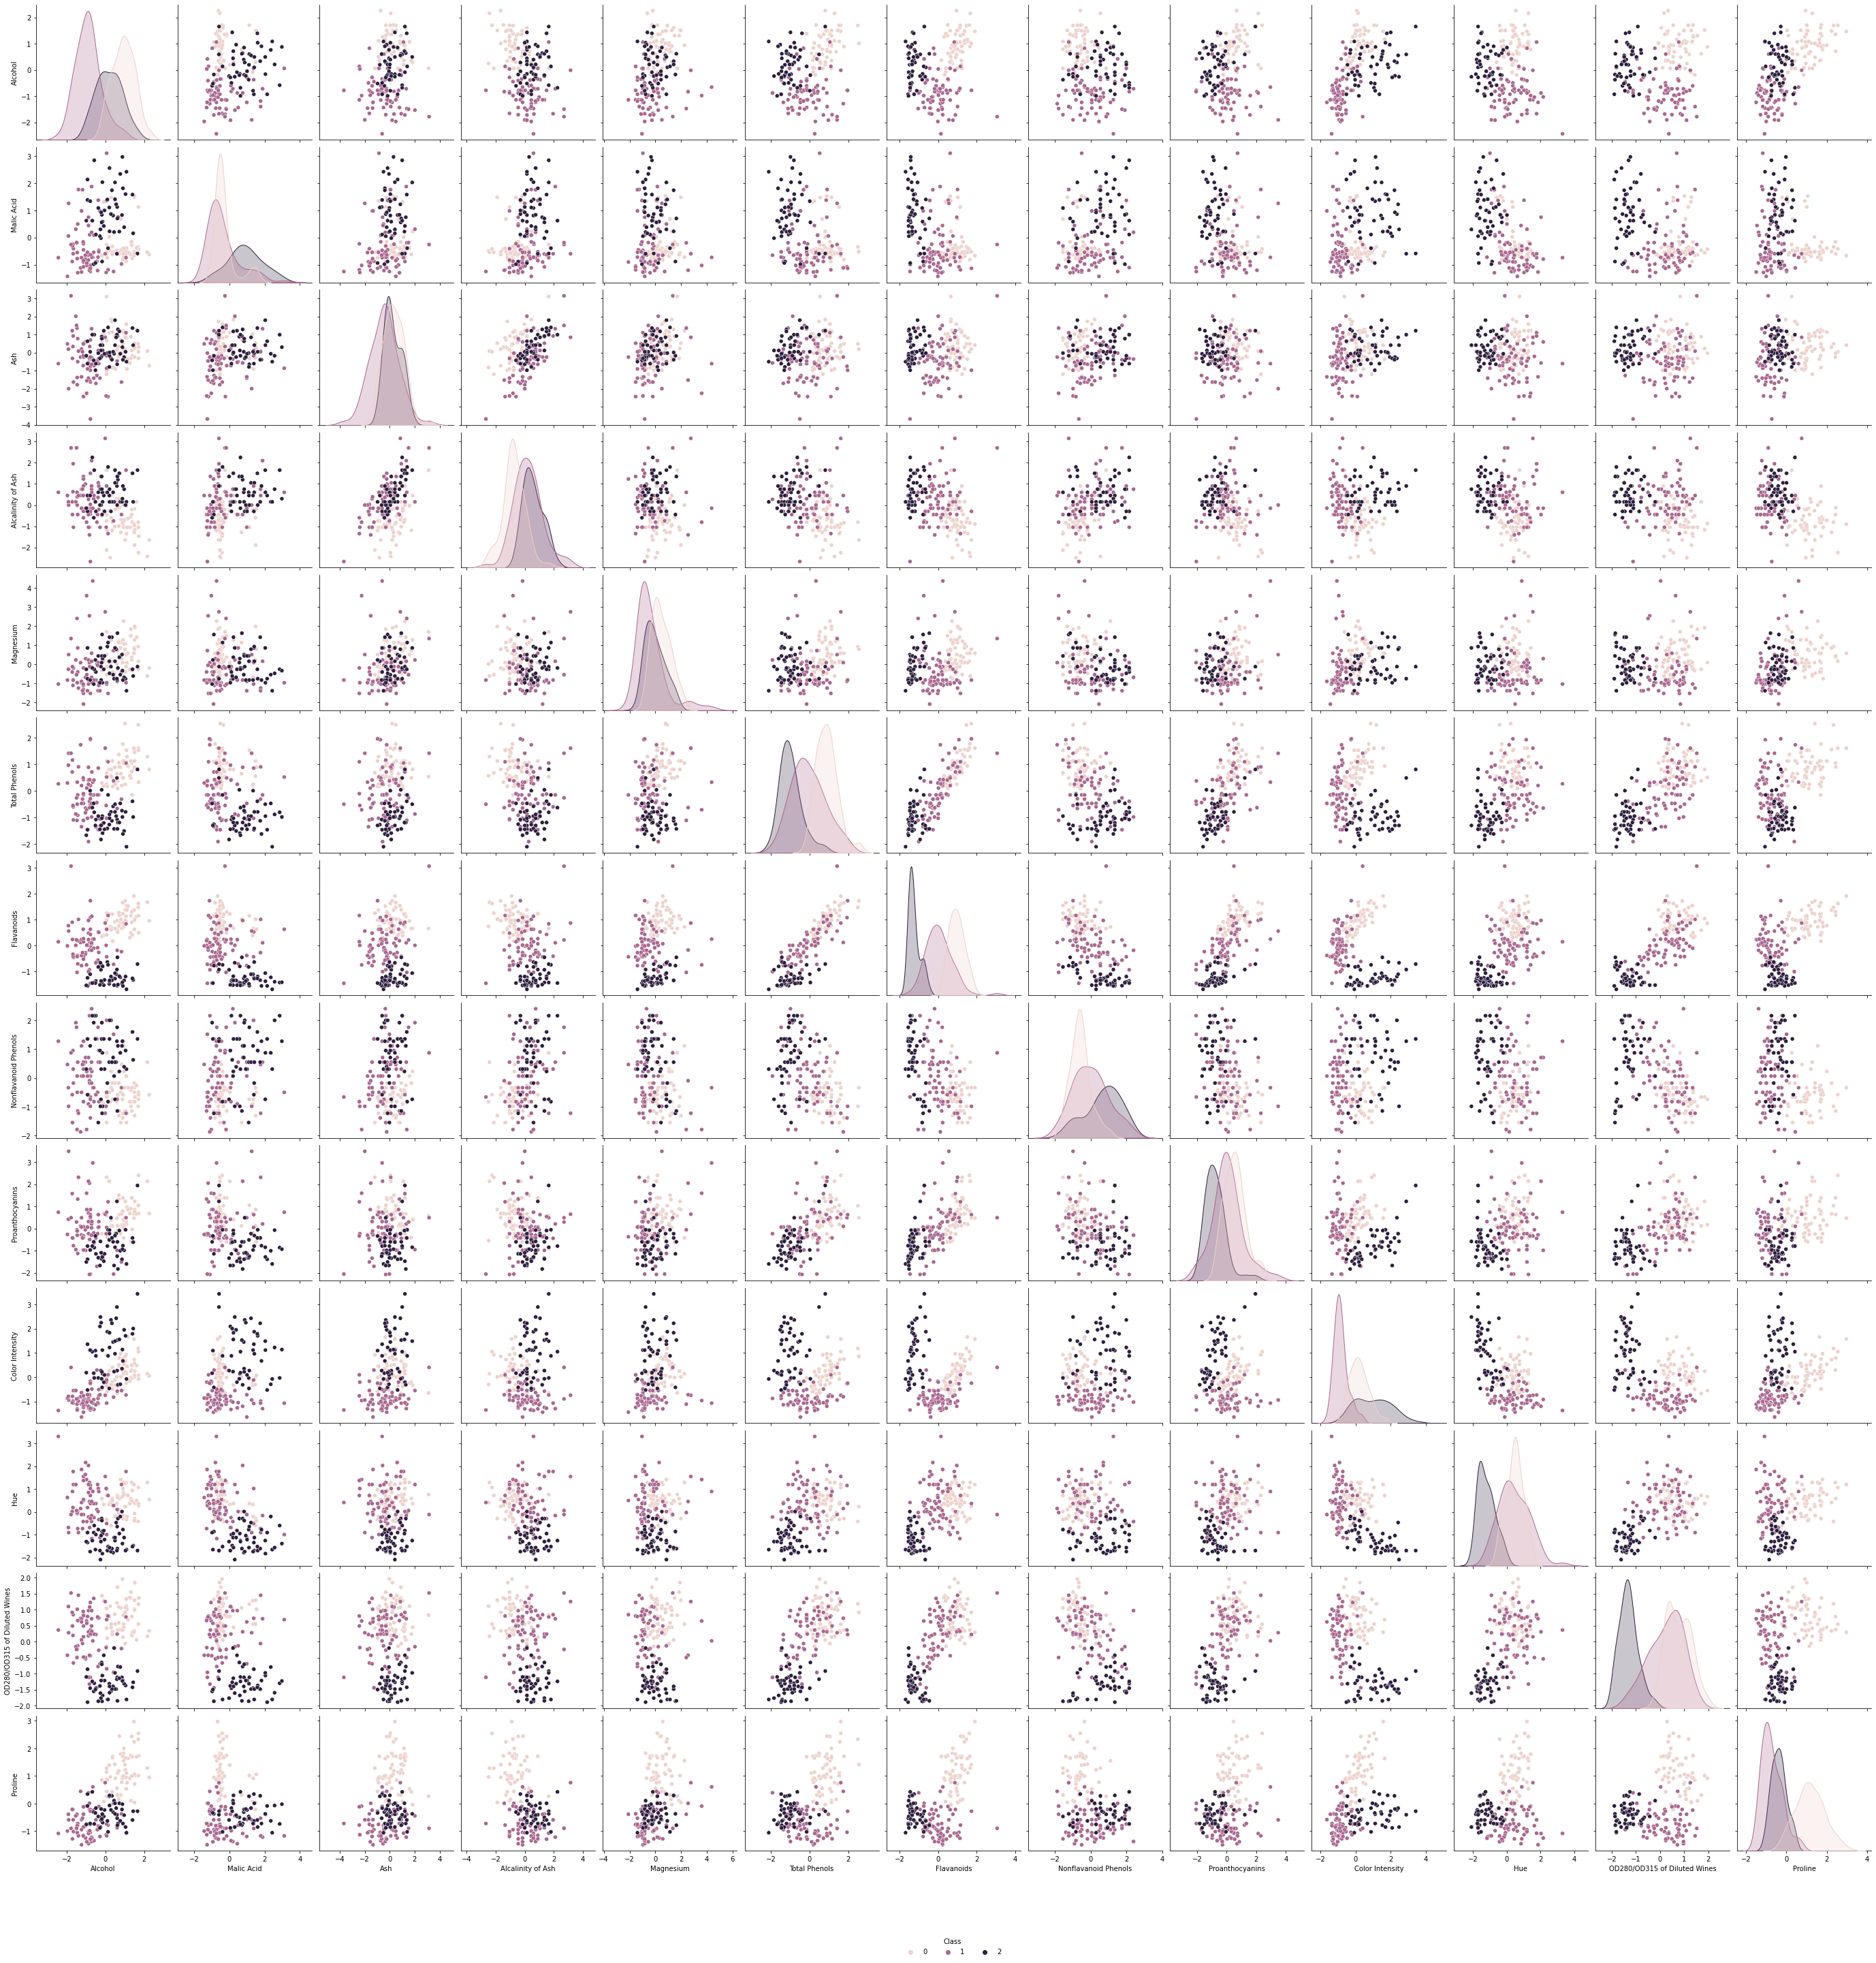

In [7]:
plt.figure(figsize=(12,12))
g = sns.pairplot(data=wine, hue="Class", size=3)
sns.move_legend(g, "lower center", bbox_to_anchor=(0.5, -0.035), ncol=3, title='Class', frameon=False)

#### Convert dataframe to array

In [8]:
feat_array = standardized_data.values

#### Calculate within cluster sum of squares for k in the range 1 - 11

In [9]:
wcss = []

for k in range(1, 11): # sets k in the range of 1 - 11
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42) 
    kmeans.fit(feat_array)
    wcss.append(kmeans.inertia_)

# max_iter is the number of iterations of the k-means algorithm in a single run (number of times the centroid is recomputed)
# the n_init is the number of times the k-means algorithm is run with different centroid seeds

#### Use the elbow method to determine the optimum number of clusters

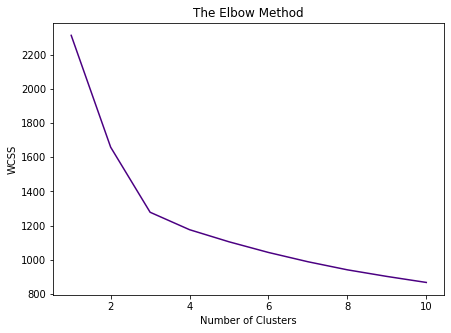

In [10]:
plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, color='indigo')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

The optimum number of clusters is 3, as confirmed by using the Elbow Method.

#### Apply K-Means clustering and predict the cluster index of each sample

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(feat_array) # predict the cluster index of each sample

#### Visualise the clusters

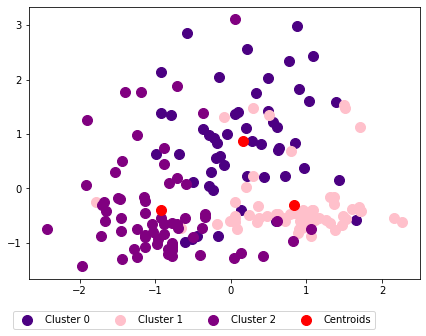

In [12]:
fig,axes = plt.subplots(figsize=(7,5))

# visualising the clusters 
plt.scatter(feat_array[y_kmeans == 0, 0], feat_array[y_kmeans == 0, 1], s = 100, c = 'indigo', label = 'Cluster 0')
plt.scatter(feat_array[y_kmeans == 1, 0], feat_array[y_kmeans == 1, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(feat_array[y_kmeans == 2, 0], feat_array[y_kmeans == 2, 1], s = 100, c = 'purple', label = 'Cluster 2')

# plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

# plots legend outside of the grid, bottom centre of the figure
plt.legend(ncol = 4, bbox_to_anchor=(0.9, -0.1))

#### Visualise and describe the characteristics of each cluster

In [13]:
kmeans.fit(feat_array) # fit the model 
clusters = standardized_data.copy()
clusters['Cluster'] = kmeans.labels_ # assigns cluster labels to features
polar = clusters.groupby("Cluster").mean().reset_index() # finds the mean of each feature variable by cluster
polar = pd.melt(polar, id_vars=["Cluster"])
fig = px.line_polar(polar, r="value", theta="variable", color="Cluster", line_close=True, height=400, width=700, color_discrete_sequence=['darkviolet','deeppink','orchid'], template="plotly_dark")
fig.update_layout(legend=dict(
    yanchor="top",
    y=1.05,
    xanchor="right",
    x=1.05
))
fig.show()

/Users/nanfletcher-lloyd/.local/lib/python3.8/site-packages/plotly/express/_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
/Users/nanfletcher-lloyd/.local/lib/python3.8/site-packages/plotly/express/_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
/Users/nanfletcher-lloyd/.local/lib/python3.8/site-packages/plotly/express/_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])


Useful to visualise but not penalised for not including.

In [14]:
pie = clusters.groupby('Cluster').size().reset_index()
pie.columns=['Cluster','Value']
fig = px.pie(pie, values='Value', names='Cluster', color='Cluster', category_orders={"Cluster": ["0", "1", "2"]}, height=400, width=700, color_discrete_sequence=['darkviolet','deeppink','orchid'], template="plotly_dark")
fig.update_layout(legend=dict(
    yanchor="top",
    y=1.05,
    xanchor="right",
    x=1.05
))
fig.show()


From these plots, we can understand the characteristics of each cluster of wines. 

- Cluster 0 has greater color intensity, higher alcalinity of ash, as well as more non flavanoid phenols and malic acid.
- Cluster 1 has more flavanoids, total phenols, proanthocyanins, and OD280/OD315 of diluted wines, as well as a higher level of proline, alcohol, and magnesium. 
- Cluster 2 has greater hue and more flavanoids, total phenols, proanthocyanins and OD280/OD315 of diluted wines than Cluster 0 and more non flavanoid phenols and a greater alcalinity of ash than Cluster 1.
